In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [7]:
demographic = pd.read_csv('../data/national-health-and-nutrition-examination-survey/demographic.csv', sep=',')
diet = pd.read_csv('../data/national-health-and-nutrition-examination-survey/diet.csv', sep=',')
examination = pd.read_csv('../data/national-health-and-nutrition-examination-survey/examination.csv', sep=',')
labs = pd.read_csv('../data/national-health-and-nutrition-examination-survey/labs.csv', sep=',')
medications = pd.read_csv('../data/national-health-and-nutrition-examination-survey/medications.csv', sep=',', encoding='iso-8859-1')
questionnaire = pd.read_csv('../data/national-health-and-nutrition-examination-survey/questionnaire.csv', sep=',')

In [8]:
#Limpieza de medications
medications = medications[medications.RXDRSD1.notnull()]

In [9]:
df = pd.merge(demographic, examination, how='outer', on='SEQN')
# df
df = pd.merge(df, diet, how='outer', on='SEQN')
# df
df = pd.merge(df, labs, how='outer', on='SEQN')
# df
df = pd.merge(df, medications, how='outer', on='SEQN')
# df
df = pd.merge(df, questionnaire, how='outer', on='SEQN')
# df

In [10]:
#Se eliminan las filas y columnas que tengan todos los elementos nulos
df=df.dropna(axis=0,how='all')
df=df.dropna(axis=1,how='all')

In [6]:
#IMPUTACION NAN

In [11]:
#Imputamos RIDAGEMN. Esta variable es la edad en meses y en pacientes mayores de 2 años no aparece este dato. Es una variable
#interesante de mantener para poder tener una edad más exacta.
#Así que en los registros que no existan, multiplicamos la edad en años, RIDAGEYR, por 12 para obtener los meses.
# df.RIDAGEYR*12

df.RIDAGEMN=df.RIDAGEMN.replace(np.nan, df.RIDAGEYR*12)

In [12]:
#Imputamos RIDEXAGM. Esta variable es la edad en meses en el momento del examen. Si el valor es nulo, 
# lo imputamos con el valor de RIDAGEMN

df.RIDEXAGM=df.RIDEXAGM.replace(np.nan, df.RIDAGEMN)

In [13]:
#Imputación de nan
for column in df.columns:
    if df[column].isnull().sum() != 0:
        if df[column].dtype==object:
            df[column].fillna(value=df[column].value_counts().index[0],inplace =True)
        else:
            df[column].fillna(df[column].median(),inplace =True)

In [29]:
#CREAMOS VARIABLE IMC, la altura está en cm
df.BMI=df.BMXWT*100/df.BMXHT.astype(np.float64)

C:\Users\Maria Jose- Javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [15]:
# CORRELACION
matrizCorrelacion=df.corr()

In [16]:
variablesRelacionadas = list()
for i in range(len(matrizCorrelacion)):
    var1 = matrizCorrelacion.columns[i]
    for j in range(len(matrizCorrelacion)):
        var2 = matrizCorrelacion.columns[j]
        elemento = matrizCorrelacion.iloc[i,j]
        if (i<j) & (abs(elemento)==1):
            a = list()
            a.append([var1, var2])
            a.append(elemento)
            variablesRelacionadas.append(a)
variablesRelacionadas

[[['URXUMA', 'URXUMS'], 1.0],
 [['WTSAF2YR.x', 'WTSAF2YR.y'], 1.0],
 [['WTSAF2YR.x', 'WTSAF2YR'], 1.0],
 [['LBXSCA', 'LBDSCASI'], 1.0],
 [['WTSA2YR.x', 'WTSA2YR.y'], 1.0],
 [['WTSA2YR.x', 'WTSA2YR'], 1.0],
 [['WTSB2YR.x', 'WTSB2YR'], 1.0],
 [['ORXGH', 'ORXGL'], 1.0],
 [['ORXGH', 'ORXH64'], 1.0],
 [['ORXGL', 'ORXH64'], 1.0],
 [['WTSAF2YR.y', 'WTSAF2YR'], 1.0],
 [['WTSH2YR.x', 'WTSH2YR.y'], 1.0],
 [['WTSA2YR.y', 'WTSA2YR'], 1.0],
 [['SMAQUEX2', 'SMAQUEX.y'], -1.0]]

In [17]:
for i in variablesRelacionadas:
    if i[0][1] in df.columns:
        df.drop([i[0][1]], axis = 1, inplace=True)

In [18]:
#CATEGORIZAMOS
df=pd.get_dummies(df)

In [30]:
#NORMALIZAMOS CON StandardScaler
scaler = StandardScaler()
dfN=scaler.fit_transform(df)

C:\Users\Maria Jose- Javier\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Maria Jose- Javier\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


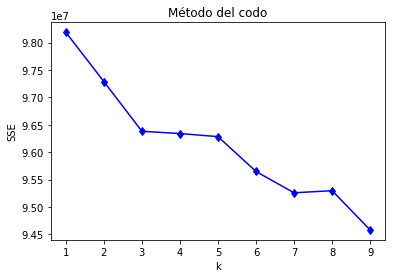

In [21]:
def regla_del_codo(k_max, datos):
    SSE = []
    for i in range(1, k_max):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(datos)
       # print (kmeans.inertia_)
        SSE.append(kmeans.inertia_)
    plt.plot(range(1, k_max), SSE, 'bd-')
    plt.title('Método del codo')
    plt.xlabel('k')
    plt.ylabel('SSE') #within cluster sum of squares
plt.show()

regla_del_codo(10, dfN)

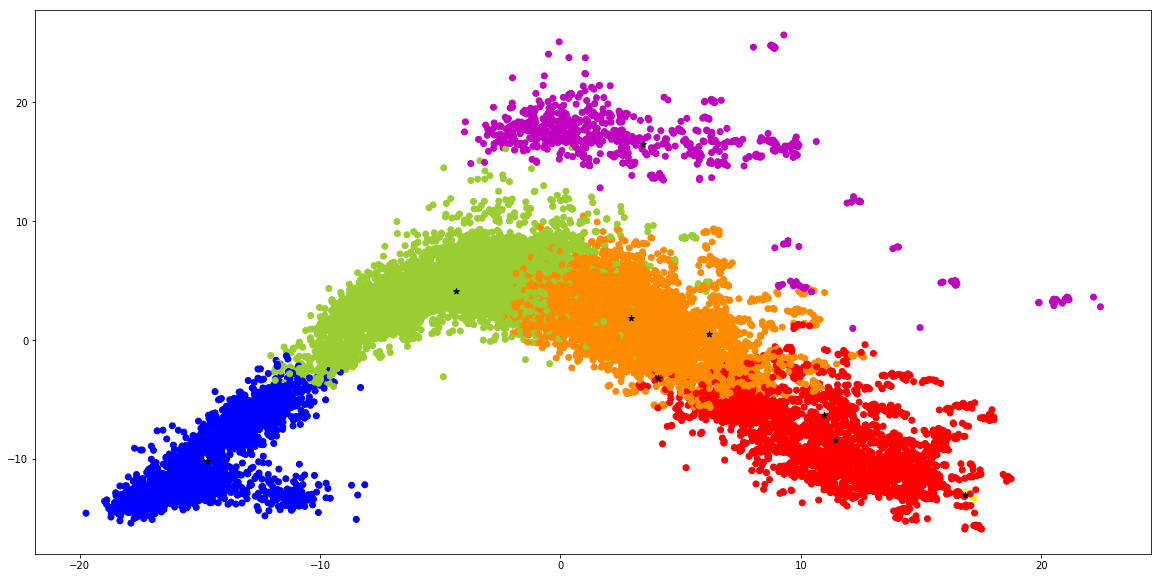

In [23]:
colores = ['r','yellowgreen','darkorange','yellow','b','aquamarine','maroon','m','pink']

plt.figure(figsize=(20, 10)) 


colorCluster=[]
kmeans = KMeans(n_clusters=9).fit(dfN)
pca = PCA(n_components=2)
pca.fit(dfN)
projectedPCA = pca.fit(dfN).transform(dfN)
        
Lab = kmeans.labels_
for i in Lab:
    colorCluster.append(colores[i])
plt.scatter(projectedPCA[:, 0], projectedPCA[:, 1], c=colorCluster)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], marker='*', c='k')

plt.show()

In [32]:
dfN = pd.DataFrame(data=dfN, columns=df.columns)

In [25]:
#PREDECIR CLUSTERES
#AÑADIMOS UNA NUEVA COLUMNA CON EL CLUSTER AL QUE PERTENECE
dfN['clusterKmeans'] = kmeans.labels_

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dfN.iloc[:,0:-1],dfN.clusterKmeans, test_size=1/3, random_state=158)

In [27]:
#SACAREMOS LAS IMPORTANCIAS SEGUN CLUSTER

rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=123)
cvs = cross_val_score(rfc, X_train, y_train, cv=4)

print('La precisión media con la validación cruzada es {}%'.format(round(np.mean(cvs)*100,2)))

C:\Users\Maria Jose- Javier\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


La precisión media con la validación cruzada es 97.67%


In [22]:
rfc.fit(X_train, y_train)

importancias_variables=rfc.feature_importances_
mejores = np.argsort(importancias_variables)[-50:][::-1]
mejoresTodas = np.argsort(importancias_variables)[::-1]

posicion=1
for variable in mejores:
    print ('La variable en {}ª posición es {}, con una importancia de {}'.format(posicion, dfN.iloc[:,variable].name,
                                                                                   round(importancias_variables[variable], 6)))
    posicion+=1

La variable en 1ª posición es OHX12TC, con una importancia de 0.018294
La variable en 2ª posición es OHX10TC, con una importancia de 0.017486
La variable en 3ª posición es OHX11TC, con una importancia de 0.017395
La variable en 4ª posición es OHX15CTC_U, con una importancia de 0.017042
La variable en 5ª posición es OHX10CTC_P, con una importancia de 0.016337
La variable en 6ª posición es OHX13TC, con una importancia de 0.015475
La variable en 7ª posición es OHX08TC, con una importancia de 0.014832
La variable en 8ª posición es OHX06TC, con una importancia de 0.014501
La variable en 9ª posición es OHX09CTC_P, con una importancia de 0.01299
La variable en 10ª posición es OHX02CTC_U, con una importancia de 0.012943
La variable en 11ª posición es OHX04TC, con una importancia de 0.012804
La variable en 12ª posición es OHX08CTC_P, con una importancia de 0.011936
La variable en 13ª posición es OHX21TC, con una importancia de 0.011932
La variable en 14ª posición es OHX05CTC_P, con una importan

In [33]:
cluster0=[]
for l in range(len(kmeans.labels_)):
    if kmeans.labels_[l]==0:
        cluster0.append(dfN.iloc[l])
        
cluster1=[]
for l in range(len(kmeans.labels_)):
    if kmeans.labels_[l]==1:
        cluster1.append(dfN.iloc[l])

cluster2=[]
for l in range(len(kmeans.labels_)):
    if kmeans.labels_[l]==2:
        cluster2.append(dfN.iloc[l])
        
cluster3=[]
for l in range(len(kmeans.labels_)):
    if kmeans.labels_[l]==3:
        cluster3.append(dfN.iloc[l])
        
cluster4=[]
for l in range(len(kmeans.labels_)):
    if kmeans.labels_[l]==4:
        cluster4.append(dfN.iloc[l])
        
cluster5=[]
for l in range(len(kmeans.labels_)):
    if kmeans.labels_[l]==5:
        cluster5.append(dfN.iloc[l])
        
cluster6=[]
for l in range(len(kmeans.labels_)):
    if kmeans.labels_[l]==6:
        cluster6.append(dfN.iloc[l])
        
cluster7=[]
for l in range(len(kmeans.labels_)):
    if kmeans.labels_[l]==7:
        cluster7.append(dfN.iloc[l])
        
cluster8=[]
for l in range(len(kmeans.labels_)):
    if kmeans.labels_[l]==8:
        cluster8.append(dfN.iloc[l])


In [35]:
sizeK0=len(cluster0)
sizeK1=len(cluster1)
sizeK2=len(cluster2)
sizeK3=len(cluster3)
sizeK4=len(cluster4)
sizeK5=len(cluster5)
sizeK6=len(cluster6)
sizeK7=len(cluster7)
sizeK8=len(cluster8)

print("""
Número de elementos en k0: {}
Número de elementos en k1: {}
Número de elementos en k2: {}
Número de elementos en k3: {}
Número de elementos en k4: {}
Número de elementos en k5: {}
Número de elementos en k6: {}
Número de elementos en k7: {}
Número de elementos en k8: {}
""".format(sizeK0,sizeK1,sizeK2,sizeK3,sizeK4,sizeK5,sizeK6,sizeK7,sizeK8))


Número de elementos en k0: 3207
Número de elementos en k1: 6078
Número de elementos en k2: 7354
Número de elementos en k3: 3
Número de elementos en k4: 2362
Número de elementos en k5: 10
Número de elementos en k6: 2
Número de elementos en k7: 764
Número de elementos en k8: 12



In [ ]:
#CON TODAS LAS VARIABLES

In [23]:
SVCclf = SVC()
SVCclf.fit(X_train, y_train)

prediccionClusterSVC = SVCclf.predict(X_test)
precisionClusterSVC = (np.sum(prediccionClusterSVC == y_test)/len(prediccionClusterSVC))*100
precisionClusterSVC

C:\Users\Maria Jose- Javier\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


96.90815398605638

In [48]:
#CON LAS 200 MEJORES
dfNReducido = dfN.iloc[:, mejoresTodas[0:200]]
X_trainR, X_testR, y_trainR, y_testR = train_test_split(dfNReducido,dfN.clusterKmeans, test_size=1/3, random_state=158)

In [49]:
SVCclfR = SVC()
SVCclfR.fit(X_trainR, y_trainR)

prediccionClusterSVCR = SVCclfR.predict(X_testR)
precisionClusterSVCR = (np.sum(prediccionClusterSVCR == y_testR)/len(prediccionClusterSVCR))*100
precisionClusterSVCR

C:\Users\Maria Jose- Javier\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


99.39375568354046